<a href="https://colab.research.google.com/github/Prasanna-02/LGMVIP-DS/blob/main/NNforHandwritingRecognisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Handwritten equation solver using NN
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy import unique , argmax 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import pandas as pd

In [ ]:
dataset = tf.keras.datasets.mnist

(x_trn, y_trn), (x_tst, y_tst) = dataset.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#preprocessing
x_trn =x_trn.reshape((x_trn.shape[0] , x_trn.shape[1],x_trn.shape[2],1))
x_tst =x_tst.reshape((x_tst.shape[0] , x_tst.shape[1],x_tst.shape[2],1))

In [ ]:
x_trn=x_trn.astype('float32')/255.0
x_tst=x_tst.astype('float32')/255.0

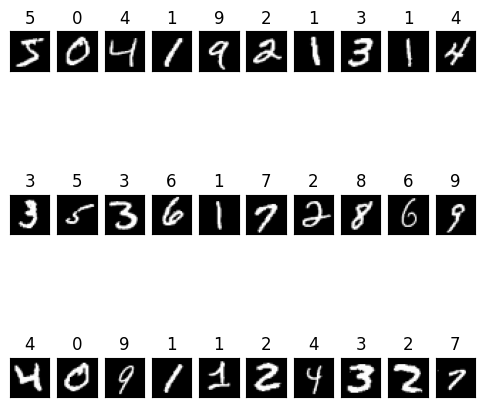

In [ ]:
#visually inspecting the dataset and verifying that the images and labels are loaded correctly.
fignum=plt.figure(figsize=(6,6))
for ind in range(30):
    ax =fignum.add_subplot(3,10,ind+1 ,xticks=[] ,yticks=[])
    ax.imshow(np.squeeze(x_trn[ind]), cmap='gray')
    ax.set_title(y_trn[ind])

In [ ]:
#constructing the model
mnist_model = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10)
])

In [ ]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


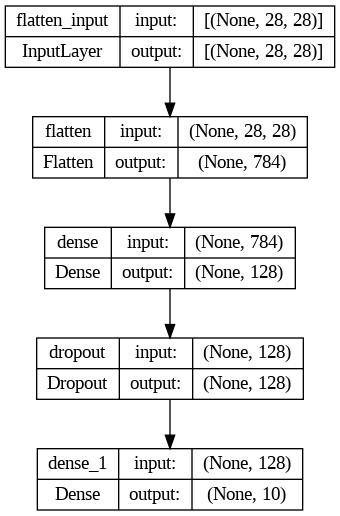

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(mnist_model, 'mnist_model.jpg', show_shapes=True)

In [ ]:
lossf = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
mnist_model.compile(optimizer='adam',loss=lossf,metrics=['accuracy'])

In [ ]:
#Training the model 
history=mnist_model.fit(x_trn, y_trn, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2926 - accuracy: 0.9155
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1409 - accuracy: 0.9586
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1066 - accuracy: 0.9678
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0874 - accuracy: 0.9735
Epoch 5/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0764 - accuracy: 0.9762
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0664 - accuracy: 0.9789
Epoch 7/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0601 - accuracy: 0.9808
Epoch 8/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0552 - accuracy: 0.9829
Epoch 9/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0489 - accuracy: 0.9837
Epoch 10/100
1875/1875 [==============================] - 8s 4ms/step - l

<Axes: >

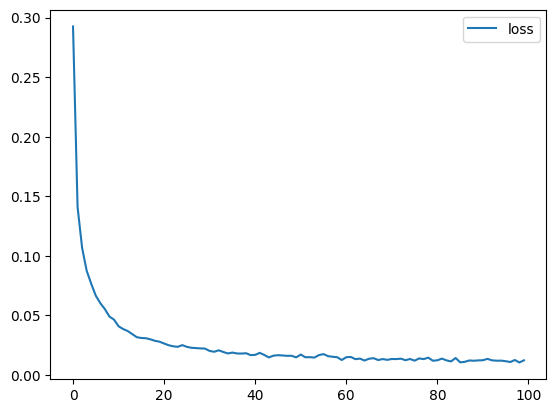

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss']].plot()

In [ ]:
mnist_model.evaluate(x_tst, y_tst, verbose=5)


[0.16491816937923431, 0.9790999889373779]

In [ ]:
probability_model = tf.keras.Sequential([ mnist_model,tf.keras.layers.Softmax() ])
probability_model(x_tst[:5])


<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.4027558e-25, 2.0449440e-37, 5.0303483e-24, 5.1660184e-13,
        0.0000000e+00, 2.0551480e-16, 0.0000000e+00, 1.0000000e+00,
        5.1283500e-24, 2.6877439e-20],
       [4.8443357e-34, 3.7811475e-17, 1.0000000e+00, 1.4786481e-23,
        0.0000000e+00, 5.0743359e-14, 3.1423791e-25, 0.0000000e+00,
        1.6376710e-29, 0.0000000e+00],
       [2.1447503e-23, 1.0000000e+00, 1.3412302e-14, 2.8494587e-18,
        1.0468977e-12, 2.0522540e-19, 1.1507553e-16, 1.5156321e-11,
        1.8141394e-12, 3.7448105e-20],
       [1.0000000e+00, 3.2929488e-31, 5.4930427e-10, 1.3157060e-20,
        2.3917651e-16, 2.2962128e-14, 8.3886464e-14, 1.4997639e-15,
        5.9442124e-21, 2.1271869e-12],
       [4.4634570e-27, 1.8190112e-38, 6.1315719e-20, 1.9724245e-31,
        1.0000000e+00, 1.1490011e-23, 2.4233298e-24, 2.3044594e-12,
        4.9394283e-27, 3.8362394e-10]], dtype=float32)>

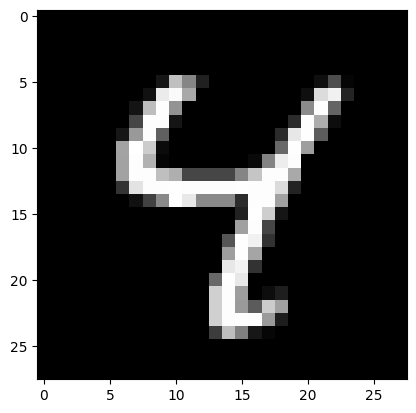

In [ ]:
img = x_tst[6]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [ ]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= mnist_model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 94ms/step
predicted : 4
